In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv('E:\Data\opzd.csv')
df.head(10)

,Отметка времени,Укажите свою учебную группу,"Оцените общее впечатление от дисциплины по десятибальной шкале (где 10 - интересная и полезная дисциплина, 1 - абсолютно неинтересная и бесполезная дисциплина)","Оцените удовлетворенность от взаимодействия с преподавателем практических занятий по дисциплине по десятибальной шкале (где 10 - полностью доволен преподавателем, проблем во взаимодействии не возникало)","Опишите, насколько сложно было получить допуск к экзамену относительно других дисциплин, которые вы изучали?","Оцените, насколько было трудно освоить и понять дисциплину, а также укажите, какую роль в этом процессе занимают методические материалы","Опишите, пожалуйста, общее впечатление от дисциплины: что понравилось/не понравилось, что бы вы предложили улучшить (заполняется по желанию)"
0,24.01.2022 13:26:24,Д-213,8,7,"Получить допуск было очень легко (легче, чем п...","Дисциплина осваивается легко, дополнительных м...",Создать видео объяснения по построению задания
1,24.01.2022 13:27:40,Д-213,10,10,Проблем с получением допуска к экзамену не воз...,"Дисциплина осваивается примерно также, как и л...","В общем и целом понравилось все, начиная с сам..."
2,24.01.2022 13:29:36,Д-213,3,6,"Получить допуск было очень легко (легче, чем п...","Дисциплина осваивается легко, дополнительных м...",Балдежно
3,24.01.2022 13:32:46,Д-211,6,10,"Получить допуск было очень легко (легче, чем п...","Дисциплина осваивается примерно также, как и л...","Very good, cool 😎 👌 👍"
4,24.01.2022 13:35:27,Д-213,10,10,Проблем с получением допуска к экзамену не воз...,"Дисциплина осваивается легко, дополнительных м...",NaN
5,24.01.2022 14:02:46,Д-213,9,8,"Получить допуск к экзамену сложно (сложнее, че...","Дисциплина осваивается легко, дополнительных м...",Хотелось бы более подробного объяснения выполн...
6,24.01.2022 14:03:05,Д-212,8,10,Проблем с получением допуска к экзамену не воз...,"Дисциплина осваивается примерно также, как и л...",NaN
7,24.01.2022 14:03:13,Д-214,10,10,"Получить допуск было очень легко (легче, чем п...",Дисциплина осваивается легко без использования...,Все
8,24.01.2022 14:04:00,Д-212,9,10,Проблем с получением допуска к экзамену не воз...,"Дисциплина осваивается легко, дополнительных м...",NaN
9,24.01.2022 14:04:15,Д-212,8,10,Проблем с получением допуска к экзамену не воз...,"Дисциплина осваивается примерно также, как и л...",NaN


In [64]:
df = df.rename(columns ={ 'Отметка времени' : 'time', 'Укажите свою учебную группу' : 'group', 
              'Оцените общее впечатление от дисциплины по десятибальной шкале (где 10 - интересная и полезная дисциплина, 1 - абсолютно неинтересная и бесполезная дисциплина)' : 'discipline_rating',
              'Оцените удовлетворенность от взаимодействия с преподавателем практических занятий по дисциплине по десятибальной шкале (где 10 - полностью доволен преподавателем, проблем во взаимодействии не возникало)' : 'teacher_rating',
               'Опишите, насколько сложно было получить допуск к экзамену относительно других дисциплин, которые вы изучали?': 'pass',
               'Оцените, насколько было трудно освоить и понять дисциплину, а также укажите, какую роль в этом процессе занимают методические материалы ' : 'complexity',
               'Опишите, пожалуйста, общее впечатление от дисциплины: что понравилось/не понравилось, что бы вы предложили улучшить (заполняется по желанию)' : 'comment' }
              )

df = df.fillna('Комментарий отсутствует')


In [65]:
groups = sorted(df['group'].unique())
print(groups)
df.groupby('group')['group'].count()

['Д-211', 'Д-212', 'Д-213', 'Д-214', 'Д-215']


group
Д-211    10
Д-212    11
Д-213    10
Д-214    11
Д-215    17
Name: group, dtype: int64

In [66]:
median_discipline_rating = df.groupby('group')['discipline_rating'].median().tolist()
mean_discipline_rating = df.groupby('group')['discipline_rating'].mean().tolist()

median_discipline_rating = [round(v,1) for v in median_discipline_rating]
mean_discipline_rating = [round(v,1) for v in mean_discipline_rating]

[Text(0, 0, '7.7'),
 Text(0, 0, '8.9'),
 Text(0, 0, '7.3'),
 Text(0, 0, '7.4'),
 Text(0, 0, '8.4')]

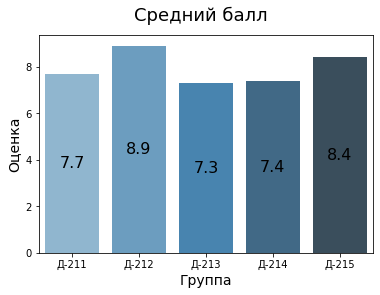

In [67]:
fig = sns.barplot (x = groups, y = mean_discipline_rating, palette="Blues_d")
fig.figure.suptitle('Средний балл', fontsize = 18)

plt.xlabel("Группа", size=14)
plt.ylabel("Оценка", size=14)
plt.bar_label(fig.containers[0],size=16, label_type='center')

[Text(0, 0, '7.5'),
 Text(0, 0, '9'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '8')]

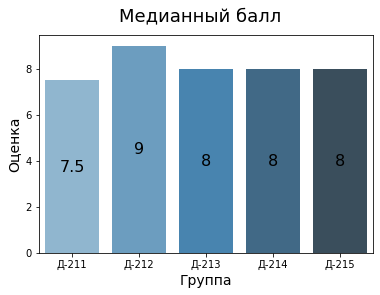

In [68]:
fig = sns.barplot (x = groups, y = median_discipline_rating, palette="Blues_d")
fig.figure.suptitle('Медианный балл', fontsize = 18)

plt.xlabel("Группа", size=14)
plt.ylabel("Оценка", size=14)
plt.bar_label(fig.containers[0],size=16, label_type='center')

In [69]:
median_teacher_rating = df.groupby('group')['teacher_rating'].median().tolist()
mean_teacher_rating = df.groupby('group')['teacher_rating'].mean().tolist()

median_teacher_rating = [round(v,1) for v in median_teacher_rating]
mean_teacher_rating = [round(v,1) for v in mean_teacher_rating]

[Text(0, 0, '10'),
 Text(0, 0, '10'),
 Text(0, 0, '8'),
 Text(0, 0, '10'),
 Text(0, 0, '10')]

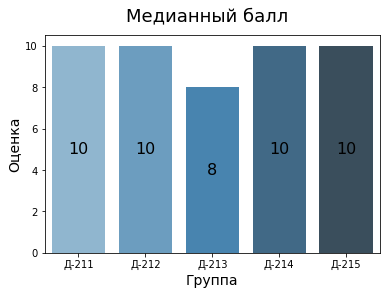

In [70]:
fig = sns.barplot (x = groups, y = median_teacher_rating, palette="Blues_d")
fig.figure.suptitle('Медианный балл', fontsize = 18)

plt.xlabel("Группа", size=14)
plt.ylabel("Оценка", size=14)
plt.bar_label(fig.containers[0],size=16, label_type='center')

[Text(0, 0, '10'),
 Text(0, 0, '10'),
 Text(0, 0, '8'),
 Text(0, 0, '10'),
 Text(0, 0, '10')]

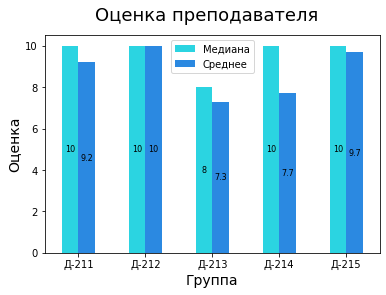

In [71]:

new_data = pd.DataFrame({'Медиана': median_teacher_rating,
                   'Среднее': mean_teacher_rating}, index=groups)

ax = new_data.plot.bar(rot=0, color={"Медиана": "#2BD4E1", "Среднее": "#2B89E1"})

ax.figure.suptitle('Оценка преподавателя', fontsize = 18)

plt.xlabel("Группа", size=14)
plt.ylabel("Оценка", size=14)
plt.bar_label(ax.containers[1],size=8, label_type='center')
plt.bar_label(ax.containers[0],size=8, label_type='center')


[Text(0, 0, '7.5'),
 Text(0, 0, '9'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '8')]

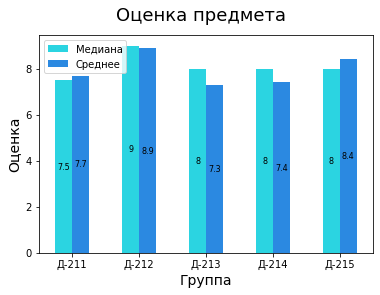

In [72]:

new_data = pd.DataFrame({'Медиана': median_discipline_rating,
                   'Среднее': mean_discipline_rating}, index=groups)

ax = new_data.plot.bar(rot=0, color={"Медиана": "#2BD4E1", "Среднее": "#2B89E1"})

ax.figure.suptitle('Оценка предмета', fontsize = 18)

plt.xlabel("Группа", size=14)
plt.ylabel("Оценка", size=14)
plt.bar_label(ax.containers[1],size=8, label_type='center')
plt.bar_label(ax.containers[0],size=8, label_type='center')

In [73]:
pass_stat_1 = df.groupby('pass')['group'].count()
pass_stat_1 = pd.DataFrame({'Допуск':pass_stat_1.index, 'Кол-во ответов':pass_stat_1.values})

#display(pass_stat_1)
#pass_stat_1.columns

pass_stat_2 = df.groupby('complexity')['group'].count()
pass_stat_2 = pd.DataFrame({'Сложность':pass_stat_2.index, 'Кол-во ответов':pass_stat_2.values})

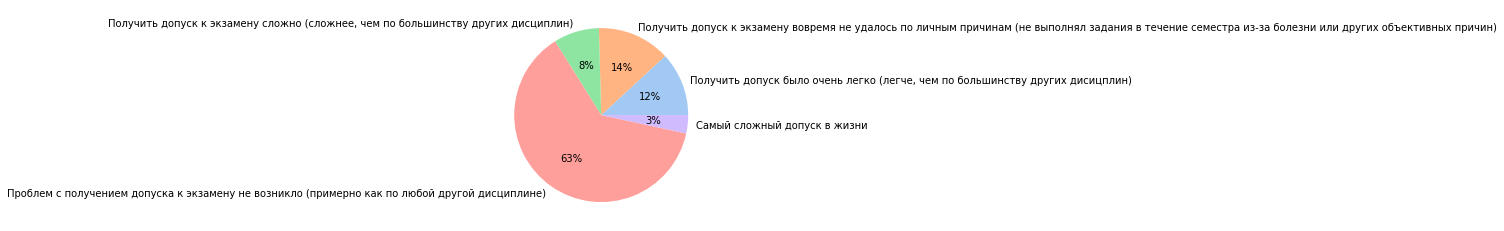

In [74]:
# Настройка цветовой гаммы
colors = sns.color_palette('pastel')[0:5]

# Рендеринг круговой диаграммы
plt.pie(pass_stat_1['Кол-во ответов'], labels = pass_stat_1['Допуск'], colors = colors, autopct='%.0f%%')
plt.show()

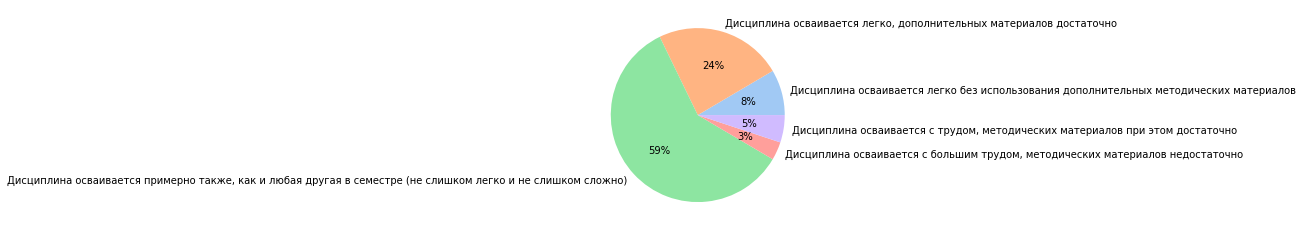

In [75]:
# Настройка цветовой гаммы
colors = sns.color_palette('pastel')[0:5]

# Рендеринг круговой диаграммы
plt.pie(pass_stat_2['Кол-во ответов'], labels = pass_stat_2['Сложность'], colors = colors, autopct='%.0f%%')
#plt.legend()
plt.show()

Итого:
- 11% считают, что получить допуск к экзамену оказалось сложнее, чем по другим дисциплинам. 89% опрошенных не выделяют дисциплину по сложности получения допуска
- 8% считают дисциплину трудной для освоения, при этом 3% считают, что методических материалов недостаточно.92% опрошенных не выделяют дисциплину по сложности освоенияd

In [76]:
print('Средняя оценка дисциплины', round(df['discipline_rating'].mean(),1))
print ('Медианная оценка дисциплины', df['discipline_rating'].median())

Средняя оценка дисциплины 8.0
Медианная оценка дисциплины 8.0


In [77]:
print('Средняя оценка преподавателя', round(df['teacher_rating'].mean(),1))
print ('Медианная оценка преподавателя', df['teacher_rating'].median(), '- преимущественно преподаватели получили оценку 10')

Средняя оценка преподавателя 8.9
Медианная оценка преподавателя 10.0 - преимущественно преподаватели получили оценку 10


In [82]:
comments = pd.DataFrame(sorted(df['comment'].unique()), columns=['Отзыв'])
#comments = pd.DataFrame(comments)
comments=comments.style.set_properties(**{'text-align': 'center', 'text_wrap': True})  
#display (comments)

comments.set_table_styles([
    {'selector': 'th.col_heading', 'props': 'text-align: center;'},
    {'selector': 'th.col_heading.level0', 'props': 'font-size: 1.5em;'},
    {'selector': 'td', 'props': 'text-align: center; font-weight: bold;'},
], overwrite=False)
display (comments)

,Отзыв
0,"Very good, cool 😎 👌 👍"
1,Балдежно
2,"Было бы удобно, если бы экзаменационные билеты были по РГР"
3,"В общем и целом понравилось все, начиная с самой дисциплину и заканчивая преподавателем"
4,В целом все понравилось
5,Все
6,Все понравилось
7,"Все понравилось, были сложности, но без них никак"
8,"Дисциплина в целом была интересной, и если вовремя выполнять каждый этап работы и не бояться общаться с преподавателем на счёт правильности выполнения ргр, то никаких затруднений не должно возникать. Хотелось бы, чтобы в дополнительных материалах лучше показывался процесс выполнения работы."
9,"Дисциплина оставила положительные впечатления, предложений по улучшению нет"
